In [34]:
import pandas as pd 

In [35]:
df=pd.read_csv('Housing.csv')

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# List of categorical columns that need binary encoding
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Apply binary encoding using LabelEncoder
for col in binary_columns:
    df[col] = encoder.fit_transform(df[col])




In [39]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [40]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [41]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [42]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Apply ordinal encoding to the 'furnishingstatus' column
df['furnishingstatus'] = encoder.fit_transform(df['furnishingstatus'])

In [43]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [11]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values for 'price' column
correlation_matrix['price']




price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64

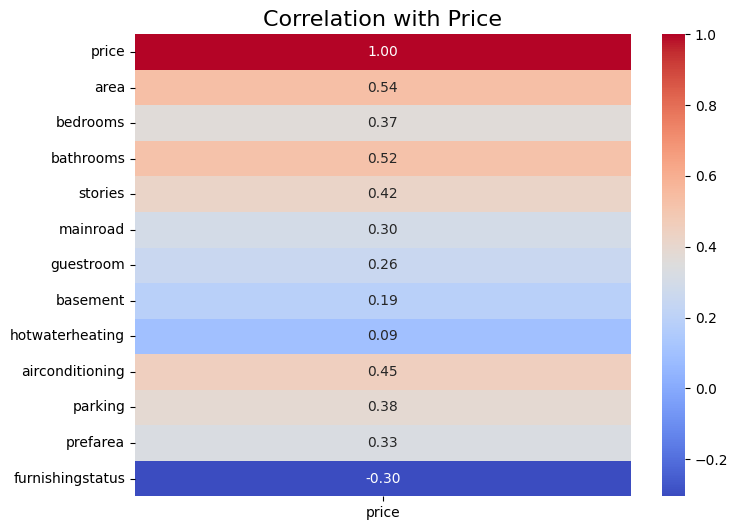

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
# Focus on correlations with 'price'
price_correlation = correlation_matrix[['price']]

# Create a heatmap for 'price' correlations
plt.figure(figsize=(8, 6))
sns.heatmap(price_correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add labels and title
plt.title("Correlation with Price", fontsize=16)
plt.show()


In [45]:
# Drop the 'hotwaterheating' column
df = df.drop('hotwaterheating', axis=1)

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,1,2,0,0


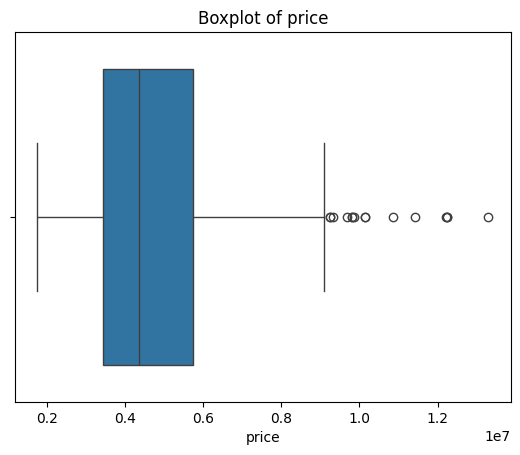

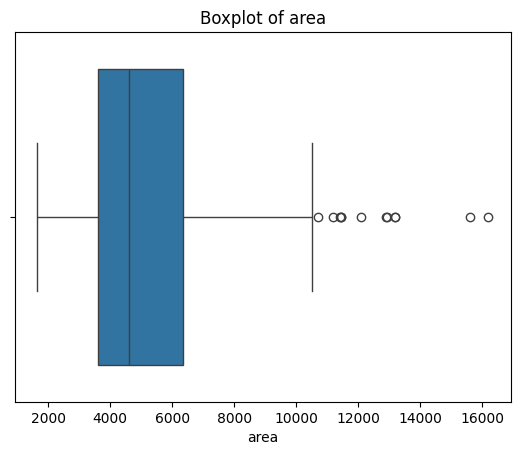

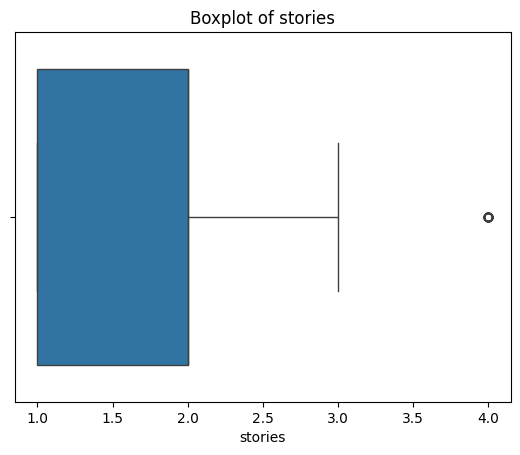

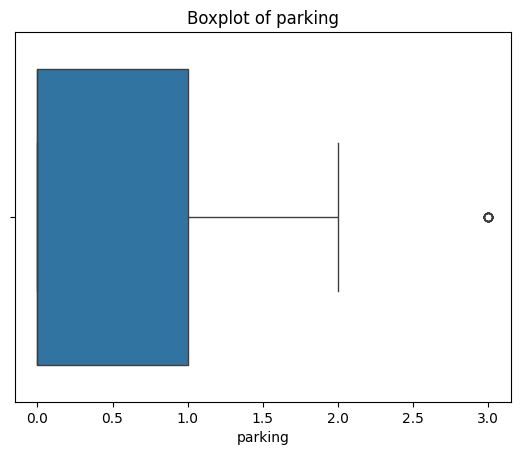

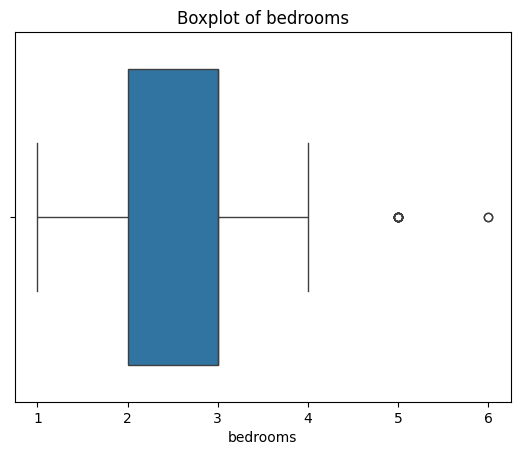

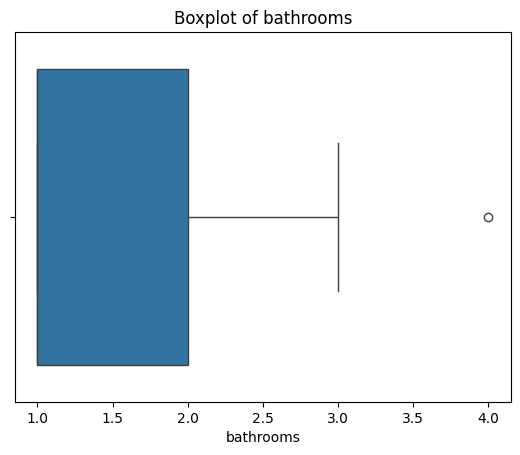

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numerical_cols = ['price', 'area', 'stories', 'parking', 'bedrooms','bathrooms']

# Create boxplots
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [47]:
import pandas as pd

# Select numerical columns
numerical_cols = ['price', 'area', 'stories', 'parking', 'bedrooms','bathrooms']

# Compute Q1, Q3, and IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)

# Check how many outliers in each column
outliers_count = outliers.sum()
print("Outliers per column:")
print(outliers_count)

# Rows with any outliers
outliers_rows = outliers.any(axis=1)
print(f"Total rows with outliers: {outliers_rows.sum()}")


Outliers per column:
price        15
area         12
stories      41
parking      12
bedrooms     12
bathrooms     1
dtype: int64
Total rows with outliers: 82


In [48]:
# Removing rows with outliers
df_cleaned = df[~outliers_rows]

# Check the shape after removal
print(f"Shape of dataset after removing outliers: {df_cleaned.shape}")


Shape of dataset after removing outliers: (463, 12)


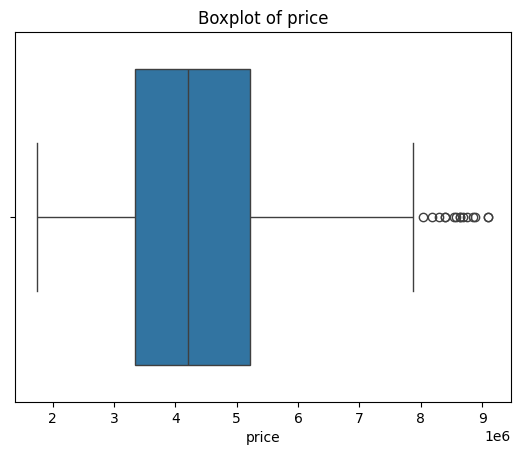

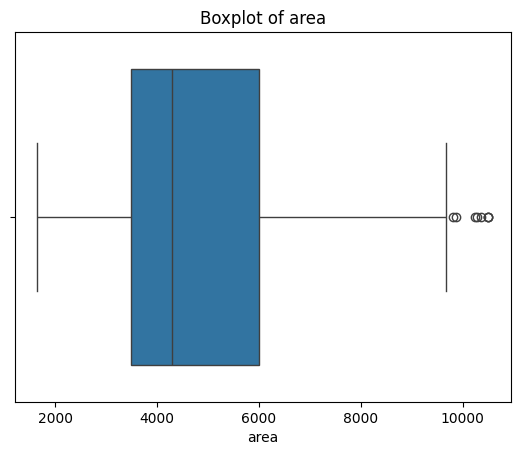

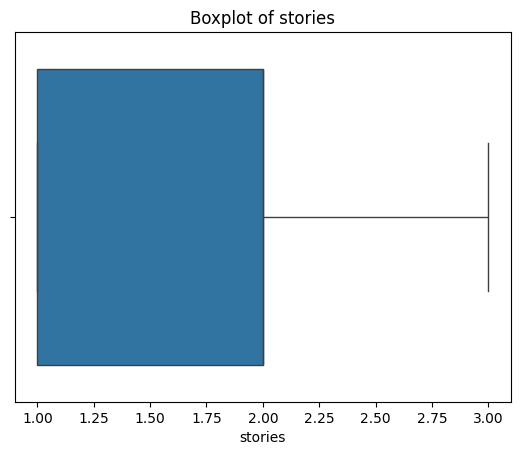

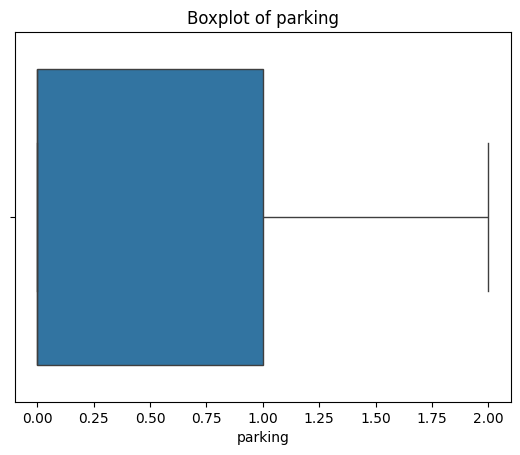

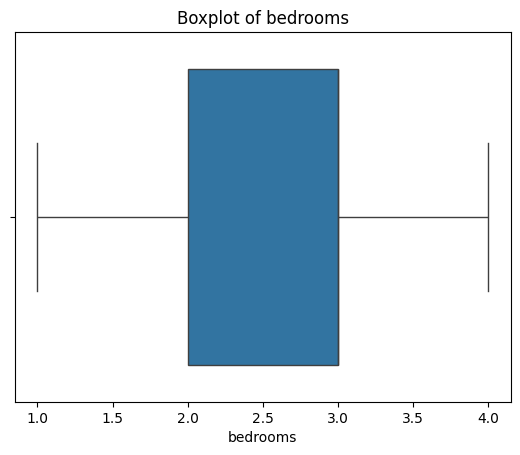

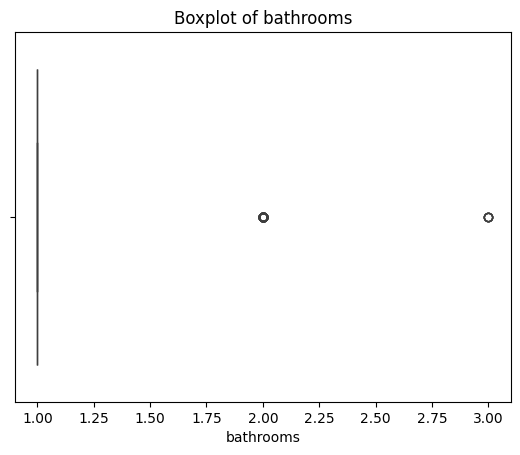

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to check for outliers
numerical_cols = ['price', 'area', 'stories', 'parking', 'bedrooms','bathrooms']

# Create boxplots
for col in numerical_cols:
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


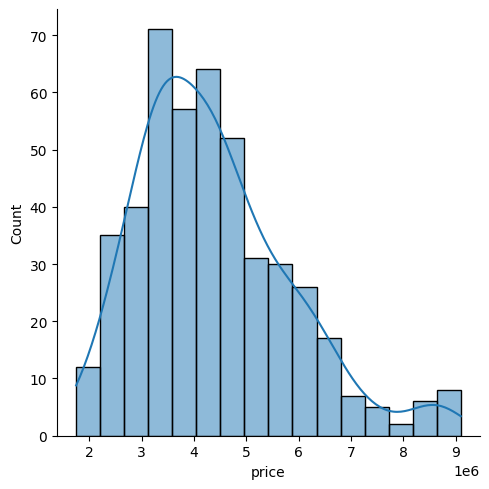

In [51]:
sns.displot(x='price', data=df_cleaned, kde=True)

In [52]:
df_cleaned['price'].skew()

np.float64(0.8602260517068516)

In [53]:
import numpy as np

# Apply log transformation to the 'price' column
df_cleaned['log_price'] = np.log1p(df_cleaned['price'])  # Using log1p to avoid log(0)

# Check the skewness of the log-transformed data
log_skewness = df_cleaned['log_price'].skew()
print(f"Skewness of Log-transformed 'price': {log_skewness}")


Skewness of Log-transformed 'price': -0.02237109166412691


C:\Users\KIIT\AppData\Local\Temp\ipykernel_28256\2393383635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['log_price'] = np.log1p(df_cleaned['price'])  # Using log1p to avoid log(0)


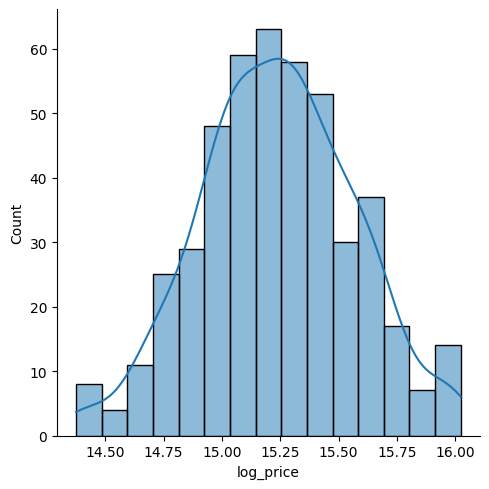

In [23]:
sns.displot(x='log_price', data=df_cleaned, kde=True)

In [54]:
# Define the independent features (X) and target (y)
X = df_cleaned.drop(columns=['price'])  # Drop the 'price' column
y = df_cleaned['price']  # 'price' is the target variable


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the features (recommended for linear models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [57]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 128380058727.7054
R-squared: 0.9506907317600567


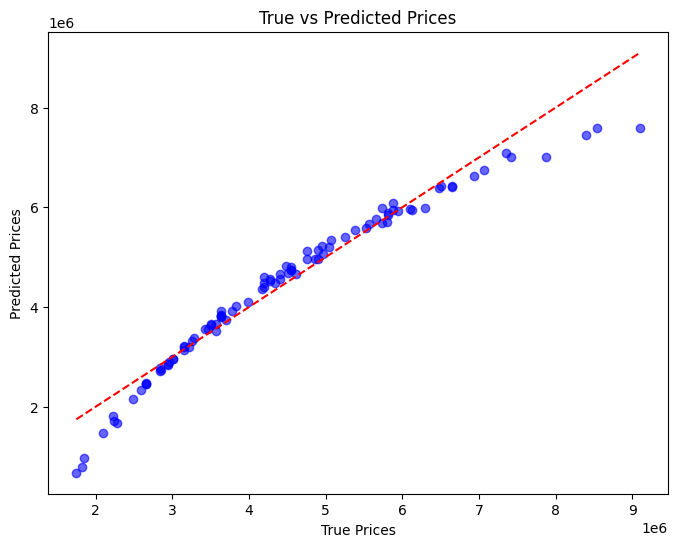

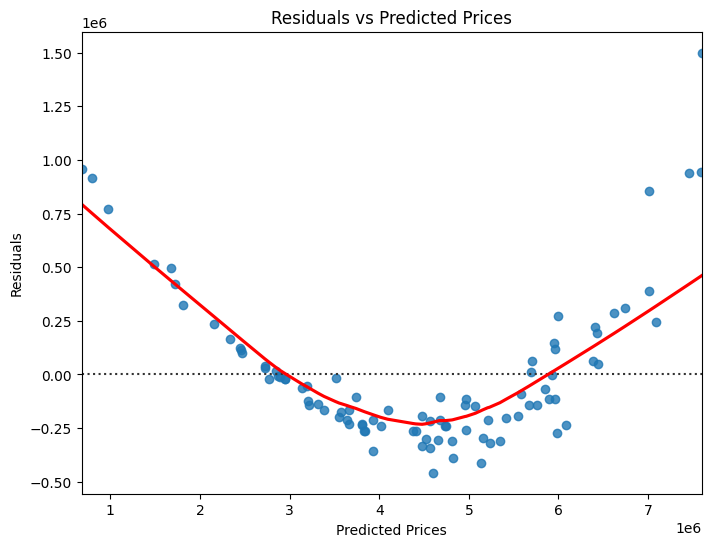

In [58]:
# Scatter plot of true vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('True vs Predicted Prices')
plt.show()

# Residuals plot (difference between actual and predicted prices)
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()
